# Import Libraries

In [39]:
import gdal as gd
import geopandas as gpd 
import matplotlib.pyplot as plt
import numpy as np
import os
import shapely as shp
import xarray

%matplotlib inline

## Set adjuables

In [40]:
# set filename for 
dcew_shp = 'data/DCEW_BND/DCEW_BND_GEO.shp'

# soil moisture shape file
boi1_soil_shp = 'data/soilmu_a_id001/soilmu_a_id001.shp'
boi2_soil_shp = 'data/soilmu_a_id683/soilmu_a_id683.shp'

# Import Data

In [41]:
dcew_bound = gpd.read_file(dcew_shp)
boi1_soil = gpd.read_file(boi1_soil_shp)
boi2_soil = gpd.read_file(boi2_soil_shp)

display([boi1_soil.shape ,boi2_soil.shape])

[(6292, 5), (5140, 5)]

# Plot dataframe

<AxesSubplot:>

<Figure size 3600x3600 with 0 Axes>

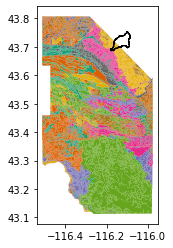

In [42]:
fig = plt.figure(figsize=(50, 50))
ax1 = boi1_soil.plot(column = 'MUSYM', cmap = 'Dark2')
dcew_bound.plot(ax = ax1 , facecolor = 'none' , edgecolor = 'black')

In [43]:
boi2_soil # look at the data

,AREASYMBOL,SPATIALVER,MUSYM,MUKEY,geometry
0,ID683,3,762,2519739,"POLYGON ((-116.01059 43.74595, -116.00864 43.7..."
1,ID683,3,608,2519658,"POLYGON ((-116.26889 44.01378, -116.26853 44.0..."
2,ID683,3,766,2519798,"POLYGON ((-115.95083 43.89415, -115.95085 43.8..."
3,ID683,3,544,2519818,"POLYGON ((-116.25363 43.90795, -116.25416 43.9..."
4,ID683,3,610,2519666,"POLYGON ((-116.19665 43.76925, -116.19634 43.7..."
...,...,...,...,...,...
5135,ID683,3,712,2519768,"POLYGON ((-115.94437 44.09202, -115.94468 44.0..."
5136,ID683,3,712,2519768,"POLYGON ((-115.94327 44.08998, -115.94432 44.0..."
5137,ID683,3,529,2519656,"POLYGON ((-115.95451 43.78111, -115.95477 43.7..."
5138,ID683,3,734,2519794,"POLYGON ((-115.99899 43.90523, -115.99883 43.9..."


In [44]:
fig = plt.figure(figsize=(50, 50))
ax2 = boi2_soil.plot(column = 'MUSYM', cmap = 'Dark2')
dcew_bound.plot(ax = ax2 , facecolor = 'none' , edgecolor = 'black')

In [ ]:
dcew_bound.crs # check the projection of the boundary

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
boi1_soil.crs # check the projection of the soil info

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
dcew_bound_wgs84 = dcew_bound.to_crs('EPSG:4326') # reproject the boundary
dcew_bound_wgs84.crs # check for the new boundary

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
boise_front_soils = gpd.pd.concat([ boi1_soil , boi2_soil ] ) # concatonate both the datasets
boise_front_soils # 

,AREASYMBOL,SPATIALVER,MUSYM,MUKEY,geometry
0,ID001,3,35,2496659,"POLYGON ((-116.29208 43.42162, -116.29208 43.4..."
1,ID001,3,13,2496640,"POLYGON ((-116.14104 43.42058, -116.14099 43.4..."
2,ID001,3,143,2519100,"POLYGON ((-116.28288 43.39489, -116.28292 43.3..."
3,ID001,3,11,2496639,"POLYGON ((-116.18151 43.52654, -116.18141 43.5..."
4,ID001,3,11,2496639,"POLYGON ((-116.16060 43.52103, -116.16029 43.5..."
...,...,...,...,...,...
5135,ID683,3,712,2519768,"POLYGON ((-115.94437 44.09202, -115.94468 44.0..."
5136,ID683,3,712,2519768,"POLYGON ((-115.94327 44.08998, -115.94432 44.0..."
5137,ID683,3,529,2519656,"POLYGON ((-115.95451 43.78111, -115.95477 43.7..."
5138,ID683,3,734,2519794,"POLYGON ((-115.99899 43.90523, -115.99883 43.9..."


<AxesSubplot:>

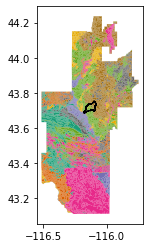

In [ ]:
ax3 = boise_front_soils.plot(column = 'MUSYM' , cmap = 'Dark2') # plot the combined info
dcew_bound_wgs84.plot( ax = ax3 , facecolor = 'none' , edgecolor = 'black' ) # plot overlay of boundary

In [ ]:
boise_front_soils = boise_front_soils[~boise_front_soils.index.duplicated()]
dcew_soils = gpd.clip(boise_front_soils , dcew_bound_wgs84 )
# dcew_soils = gpd.clip(dcew_bound_wgs84 , boise_front_soils )

<AxesSubplot:>

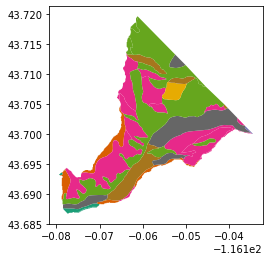

In [ ]:
# test plot
dcew_soils.plot(column  = 'MUSYM' , cmap = 'Dark2')

In [ ]:
# make a new directory for output files to keep things clean
os.mkdir('output_graphs')

# save the files to an output
dcew_soils.to_file('output_graphs/dcew_soils-2022-10-04.shp') # save as shp
dcew_soils.to_file('output_graphs/dcew_soils-2022-10-04.kml') # save as kml
dcew_soils.to_file('output_graphs/dcew_soils-2022-10-04.kmz') # save as kml